# BigMart Sales Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data

In [2]:
df_train=pd.read_csv("bigmart_train.csv")
df_test=pd.read_csv("bigmart_test.csv")

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### Getting data info

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


**Some coloms are having missing values like Item_Weight ,Outlet_Size**

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
df_train.shape

(8523, 12)

**Some coloms are having missing values like Item_Weight ,Outlet_Size**

In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df_test.shape

(5681, 11)

In [10]:
df_train.duplicated().sum()

0

**No any duplicate values are there**

In [11]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


## data cleaning

In [12]:
# dealing with null values
df_train['Item_Weight']=df_train['Item_Weight'].replace(np.NaN,df_train['Item_Weight'].mean())
df_train=df_train.dropna(subset=['Outlet_Size'])

In [13]:
df_test['Item_Weight']=df_test['Item_Weight'].replace(np.NaN,df_test['Item_Weight'].mean())
df_test=df_test.dropna(subset=['Outlet_Size'])

In [14]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              6113 non-null object
Item_Weight                  6113 non-null float64
Item_Fat_Content             6113 non-null object
Item_Visibility              6113 non-null float64
Item_Type                    6113 non-null object
Item_MRP                     6113 non-null float64
Outlet_Identifier            6113 non-null object
Outlet_Establishment_Year    6113 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         6113 non-null object
Outlet_Type                  6113 non-null object
Item_Outlet_Sales            6113 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 620.9+ KB


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4075 entries, 0 to 5677
Data columns (total 11 columns):
Item_Identifier              4075 non-null object
Item_Weight                  4075 non-null float64
Item_Fat_Content             4075 non-null object
Item_Visibility              4075 non-null float64
Item_Type                    4075 non-null object
Item_MRP                     4075 non-null float64
Outlet_Identifier            4075 non-null object
Outlet_Establishment_Year    4075 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         4075 non-null object
Outlet_Type                  4075 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 382.0+ KB


**now data is completly cleaned**

# Getting insights

### categorical data

In [17]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    883
Snack Foods              868
Household                649
Frozen Foods             615
Dairy                    496
Canned                   471
Baking Goods             463
Health and Hygiene       367
Soft Drinks              312
Meat                     309
Breads                   179
Hard Drinks              148
Others                   123
Starchy Foods            105
Breakfast                 79
Seafood                   46
Name: Item_Type, dtype: int64

Text(0.5, 1.0, 'count of each Item')

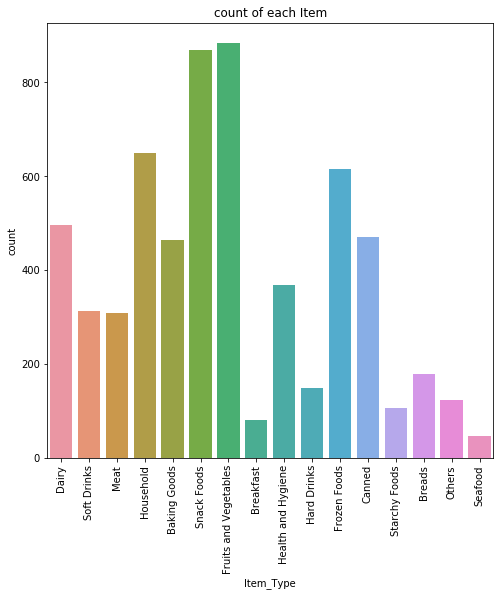

In [18]:
plt.figure(figsize=(8,8))
sns.countplot(df_train['Item_Type'])
plt.xticks(rotation=90);
plt.title("count of each Item")

In [19]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    3955
Regular    2158
Name: Item_Fat_Content, dtype: int64

Text(0.5, 1.0, 'Fat type')

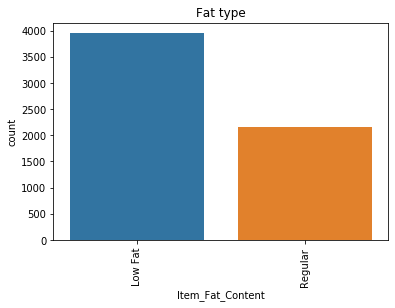

In [20]:
sns.countplot(df_train['Item_Fat_Content'])
plt.xticks(rotation=90);
plt.title("Fat type")

In [21]:
df_train['Outlet_Location_Type'].value_counts()

Tier 3    2795
Tier 1    2388
Tier 2     930
Name: Outlet_Location_Type, dtype: int64

Text(0.5, 1.0, 'Fat type')

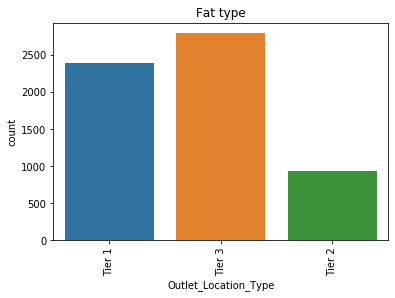

In [22]:
sns.countplot(df_train['Outlet_Location_Type'])
plt.xticks(rotation=90);
plt.title("Fat type")

In [23]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Text(0.5, 1.0, 'size of outlet')

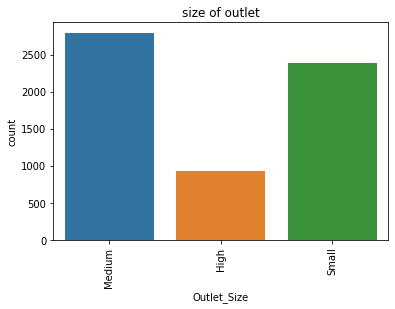

In [24]:
sns.countplot(df_train['Outlet_Size'])
plt.xticks(rotation=90);
plt.title("size of outlet")

## Bivriate

Text(0.5, 1.0, 'Item_Weight vs Item_MRP')

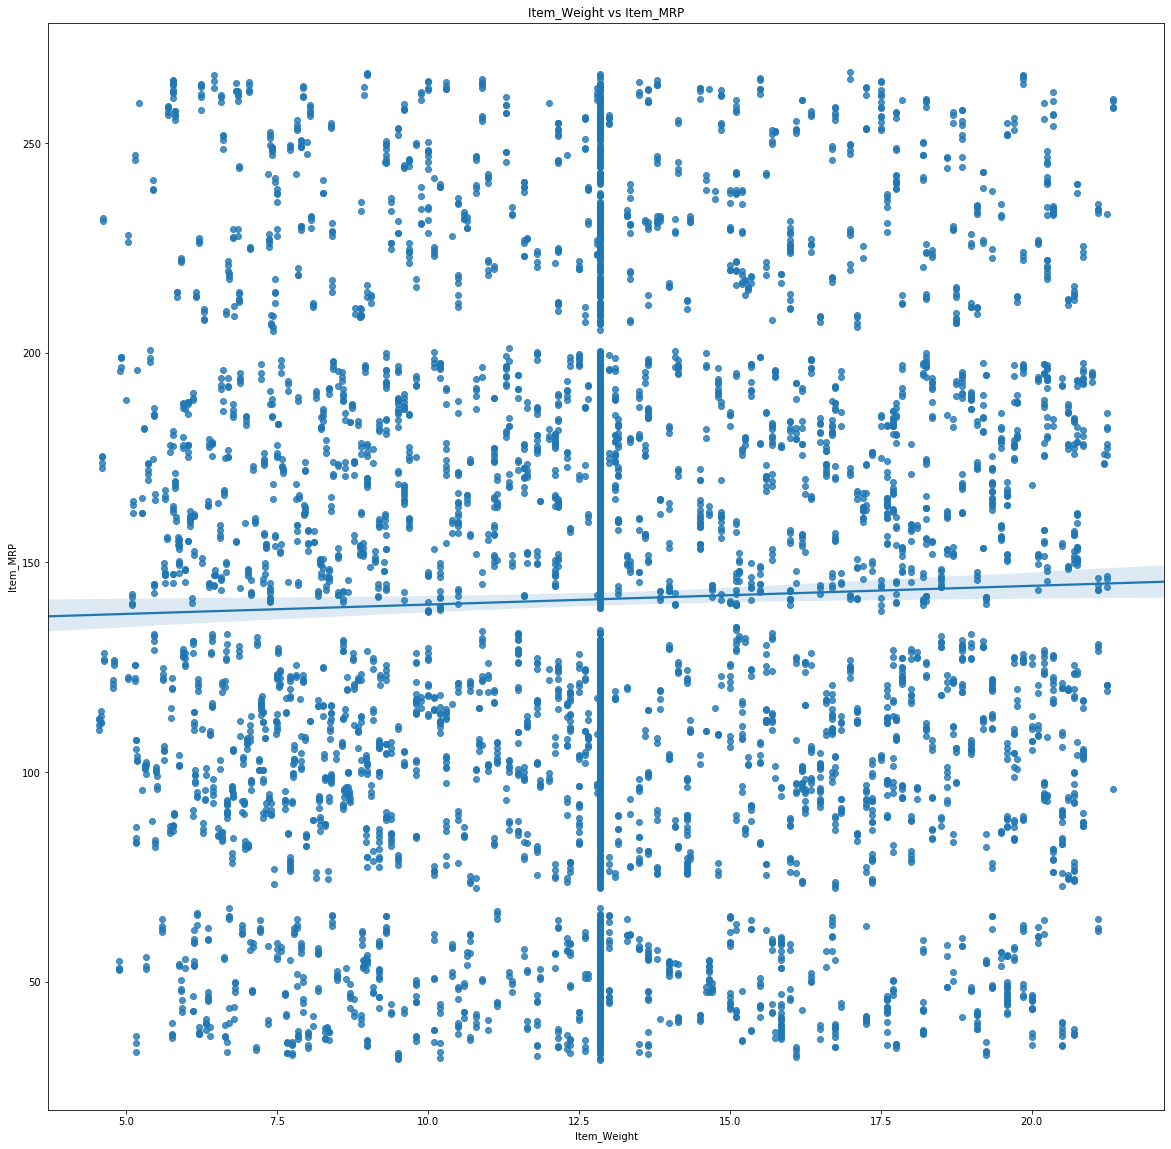

In [25]:
plt.figure(figsize=(20,20))
sns.regplot(x=df_train['Item_Weight'],y=df_train['Item_MRP']);
plt.xlabel("Item_Weight")
plt.ylabel("Item_MRP")
plt.title("Item_Weight vs Item_MRP")

Text(0.5, 1.0, 'Item_Visibility vs Item_MRP')

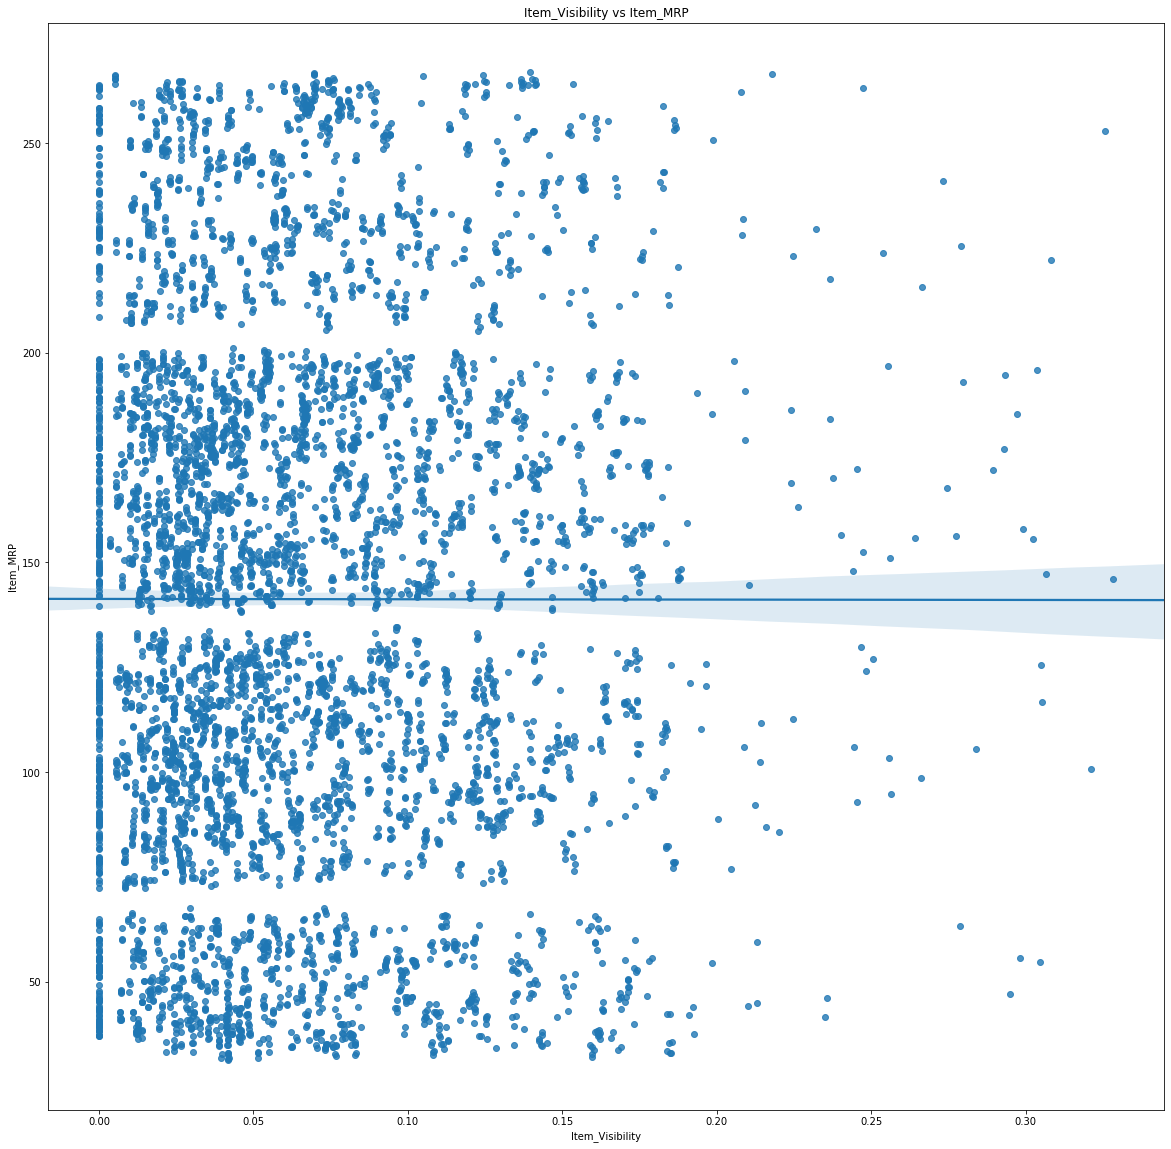

In [26]:
plt.figure(figsize=(20,20))
sns.regplot(x=df_train['Item_Visibility'],y=df_train['Item_MRP']);
plt.xlabel("Item_Visibility")
plt.ylabel("Item_MRP")
plt.title("Item_Visibility vs Item_MRP")

# Making Model to predict

In [27]:
predictors=['Item_Weight','Item_Fat_Content','Item_Visibility','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type']
target=['Item_Outlet_Sales']

In [28]:
train=df_train.copy()
test=df_test.copy()

In [29]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


## For training data

In [30]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lb=LabelEncoder()
categ=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type']
for i in categ:
    train[i]=lb.fit_transform(train[i])


In [31]:
train_data=pd.get_dummies(train, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type'])

In [32]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.300,0.016047,249.8092,OUT049,1999,3735.1380,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920,0.019278,48.2692,OUT018,2009,443.4228,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500,0.016760,141.6180,OUT049,1999,2097.2700,1,0,1,...,0,0,0,0,1,0,0,0,0,0
4,NCD19,8.930,0.000000,53.8614,OUT013,1987,994.7052,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,FDP36,10.395,0.000000,51.4008,OUT018,2009,556.6088,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
train_data=train_data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)


In [43]:
train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,0.016047,249.8092,3735.1380,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,0.019278,48.2692,443.4228,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0.016760,141.6180,2097.2700,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,8.930,0.000000,53.8614,994.7052,1,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
5,10.395,0.000000,51.4008,556.6088,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 32 columns):
Item_Weight                        6113 non-null float64
Item_Visibility                    6113 non-null float64
Item_MRP                           6113 non-null float64
Item_Outlet_Sales                  6113 non-null float64
Item_Fat_Content_0                 6113 non-null uint8
Item_Fat_Content_1                 6113 non-null uint8
Outlet_Location_Type_0             6113 non-null uint8
Outlet_Location_Type_1             6113 non-null uint8
Outlet_Location_Type_2             6113 non-null uint8
Outlet_Size_0                      6113 non-null uint8
Outlet_Size_1                      6113 non-null uint8
Outlet_Size_2                      6113 non-null uint8
Outlet_Type_0                      6113 non-null uint8
Outlet_Type_1                      6113 non-null uint8
Outlet_Type_2                      6113 non-null uint8
Outlet_Type_3                      6113 non-null uint8
Item_

## For test data

In [38]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lb=LabelEncoder()
categ=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type']
for i in categ:
    test[i]=lb.fit_transform(test[i])


In [39]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,1,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,1
4,FDY38,12.695633,2,0.118599,Dairy,234.2300,OUT027,1985,1,2,3
5,FDH56,9.800000,2,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,2,0,1
6,FDL48,19.350000,2,0.082602,Baking Goods,50.1034,OUT018,2009,1,2,2
7,FDC48,12.695633,1,0.015782,Baking Goods,81.0592,OUT027,1985,1,2,3


In [40]:
test_data=pd.get_dummies(test, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type'])

In [41]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,1,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,1
4,FDY38,12.695633,2,0.118599,Dairy,234.2300,OUT027,1985,1,2,3
5,FDH56,9.800000,2,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,2,0,1
6,FDL48,19.350000,2,0.082602,Baking Goods,50.1034,OUT018,2009,1,2,2
7,FDC48,12.695633,1,0.015782,Baking Goods,81.0592,OUT027,1985,1,2,3


In [47]:
test_data=test_data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)


In [59]:
test_data=test_data.drop(['Item_Fat_Content_3','Item_Fat_Content_4'],axis=1)

In [66]:
test_data=test_data.drop(['Item_Fat_Content_2'],axis=1)

In [67]:
test_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,20.750000,0.007565,107.8622,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,12.695633,0.118599,234.2300,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,9.800000,0.063817,117.1492,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,19.350000,0.082602,50.1034,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,12.695633,0.015782,81.0592,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [61]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4075 entries, 0 to 5677
Data columns (total 32 columns):
Item_Weight                        4075 non-null float64
Item_Visibility                    4075 non-null float64
Item_MRP                           4075 non-null float64
Item_Fat_Content_0                 4075 non-null uint8
Item_Fat_Content_1                 4075 non-null uint8
Item_Fat_Content_2                 4075 non-null uint8
Outlet_Location_Type_0             4075 non-null uint8
Outlet_Location_Type_1             4075 non-null uint8
Outlet_Location_Type_2             4075 non-null uint8
Outlet_Size_0                      4075 non-null uint8
Outlet_Size_1                      4075 non-null uint8
Outlet_Size_2                      4075 non-null uint8
Outlet_Type_0                      4075 non-null uint8
Outlet_Type_1                      4075 non-null uint8
Outlet_Type_2                      4075 non-null uint8
Outlet_Type_3                      4075 non-null uint8
Item_Ty

# Fitting Linear Regression

In [62]:
X_train=train_data.drop(['Item_Outlet_Sales'],axis=1)


In [63]:
y_train=train_data.Item_Outlet_Sales

In [64]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [68]:
prediction=reg.predict(test_data)

In [72]:
prediction

array([1810.0391525 , 5199.35027486, 1909.43113121, ..., 1084.11215839,
       2299.8750701 , 2434.95281416])

In [73]:
predicted_data=pd.DataFrame({'Item_Identifier':test['Item_Identifier'],'Item_Outlet_Sales':prediction})

In [75]:
predicted_data.head()

,Item_Identifier,Item_Outlet_Sales
0,FDW58,1810.039153
4,FDY38,5199.350275
5,FDH56,1909.431131
6,FDL48,459.653794
7,FDC48,2746.752568


In [76]:
predicted_data.to_csv("Predicted_outlet_sales.csv",index=False)